In this post, we're going to produce a couple of animations related to typical sound sources encountered in the study of acoustics: monopole, dipole and quadrupole sources (using `holoviews` with the `matplotlib` backend).

We start by creating an $(x, y)$ grid of space.

In [1]:
import numpy as np
import holoviews as hv
hv.extension('matplotlib', logo=False)

In [2]:
x = np.linspace(-15, 15, num=100)
y = np.linspace(-15, 15, num=100)

X, Y = np.meshgrid(x, y)

Using this grid, we can build a phase map for a monopole source. By phase map, I mean the change in phase, at the selected frequency that a radial wave would incur by propagating from the origin to the point of the grid.

:QuadMesh   [x,y]   (z)
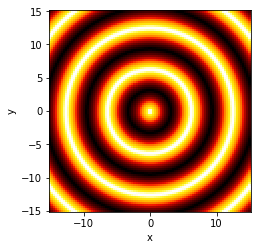

In [3]:
r = np.sqrt(X**2 + Y**2)
phase_map1= np.exp(1j * r)

hv.QuadMesh((X, Y, np.real(phase_map1)))

We can animate this phase map by adding a phase term that varies as a function of time. If we discretize a single period in a given number of frames and loop over the frames, we can generate an "infinite" animation. Let's try this!

In [4]:
N = 15

In [5]:
%%output holomap='scrubber'
hmap1 = hv.HoloMap({i: hv.QuadMesh((X, Y, np.real(phase_map1* np.exp(-1j * i / N * 2 * np.pi))), 
                                   label='monopole') for i in range(N)}).opts(colorbar=True)
hmap1

:HoloMap   [Default]
   :QuadMesh   [x,y]   (z)

Let's apply the same logic to a dipole, made out of two sources a fraction of a wavelength apart and out of phase.

In [6]:
delta = 2.5
r1 = np.sqrt((X-delta)**2 + Y**2)
r2 = np.sqrt((X+delta)**2 + Y**2)
phase_map2 = .5 * np.exp(1j * r1) - .5 * np.exp(1j * r2)

In [7]:
%%output holomap='scrubber' 
hmap2 = hv.HoloMap({i: hv.QuadMesh((X, Y, np.real(phase_map2 * np.exp(-1j * i / N * 2 * np.pi))), 
                                   label='dipole') for i in range(N)}).opts(colorbar=True)
hmap2

:HoloMap   [Default]
   :QuadMesh   [x,y]   (z)

Finally, the same formulas apply to a quadripole source, which is made out of four sources, two of them being out of phase.

In [8]:
gamma = 4.5
r1 = np.sqrt((X - gamma)**2 + (Y - gamma)**2)
r2 = np.sqrt((X - gamma)**2 + (Y + gamma)**2)
r3 = np.sqrt((X + gamma)**2 + (Y - gamma)**2)
r4 = np.sqrt((X + gamma)**2 + (Y + gamma)**2)
phase_map3 = .25 * np.exp(1j * r1) - .25 * np.exp(1j * r2) + .25 * np.exp(1j * r3) - .25 * np.exp(1j * r4)

In [9]:
%%output holomap='scrubber'
hmap3 = hv.HoloMap({i: hv.QuadMesh((X, Y, np.real(phase_map3 * np.exp(-1j * i / N * 2 * np.pi))), 
                                   label='quadrupole') for i in range(N)}).opts(colorbar=True)
hmap3

:HoloMap   [Default]
   :QuadMesh   [x,y]   (z)

As a final step, let's add a point cloud of particle moving on top of these monopole source. We first randomly create some points:

In [10]:
M = 400
Xm = x.min() + np.random.rand(M) * (x.max() - x.min())
Ym = y.min() + np.random.rand(M) * (y.max() - y.min())
Rm = np.sqrt(Xm**2 + Ym**2)
Tm = np.arctan2(Ym, Xm)

Build a phase map, using the same formula as before, but inserting the coordinates of the points.

In [11]:
points = np.c_[Rm * np.cos(Tm), Rm * np.sin(Tm)]
phase_map4 = 1j * np.exp(1j * 1 * Rm)

And then we animate it using an oscillation in time.

In [12]:
%%output holomap='scrubber'
hmap4 = hv.HoloMap({i: hv.Points(points + np.c_[np.real(phase_map4 * np.cos(Tm) * np.exp(-1j * i / N * 2 * np.pi)),
                                               np.real(phase_map4 * np.sin(Tm) * np.exp(-1j * i / N * 2 * np.pi))], 
                                                   label='points') for i in range(N)})
hmap4

:HoloMap   [Default]
   :Points   [x,y]

The structure of the wave is visualized thanks to the particle displacement.

Using the nice plotting API of `holoviews`, we can even overlay this animation with our previous monopole field animation:

In [13]:
%%output holomap='scrubber'
hmap1 * hmap4.opts(show_legend=False)

:HoloMap   [Default]
   :Overlay
      .QuadMesh.Monopole :QuadMesh   [x,y]   (z)
      .Points.Points     :Points   [x,y]

If you like this sort of animations, a fantastic resource for endless variations on the "wavy" theme can be found at [Bees and bombs](https://twitter.com/beesandbombs).

*This post was entirely written using the IPython notebook. Its content is BSD-licensed. You can see a static view or download this notebook with the help of nbviewer at [20190129_MonopoleDipoleQuadrupole.ipynb](http://nbviewer.ipython.org/urls/raw.github.com/flothesof/posts/master/20190129_MonopoleDipoleQuadrupole.ipynb).*